## Customer Metrics Visualization & Splitting Outliers

### Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customer_metrics = pd.read_csv('../data/processed/customer_metrics.csv')

In [ ]:
customer_metrics.head()

,CustomerID,TotalSpent,OrderCount,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,PurchaseFrequency
0,12346.0,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,1,325,30.00
1,12347.0,4310.00,7,2010-12-07 14:57:00,2011-12-07 15:52:00,365,1,0.58
2,12348.0,1437.24,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,74,0.43
3,12349.0,1457.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,1,18,30.00
4,12350.0,294.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,1,309,30.00
...,...,...,...,...,...,...,...,...
4329,18280.0,180.60,1,2011-03-07 09:52:00,2011-03-07 09:52:00,1,277,30.00
4330,18281.0,80.82,1,2011-06-12 10:53:00,2011-06-12 10:53:00,1,180,30.00
4331,18282.0,178.05,2,2011-08-05 13:35:00,2011-12-02 11:43:00,118,7,0.51
4332,18283.0,2088.93,16,2011-01-06 14:14:00,2011-12-06 12:02:00,333,3,1.44


### Visualizing Segmentation Features

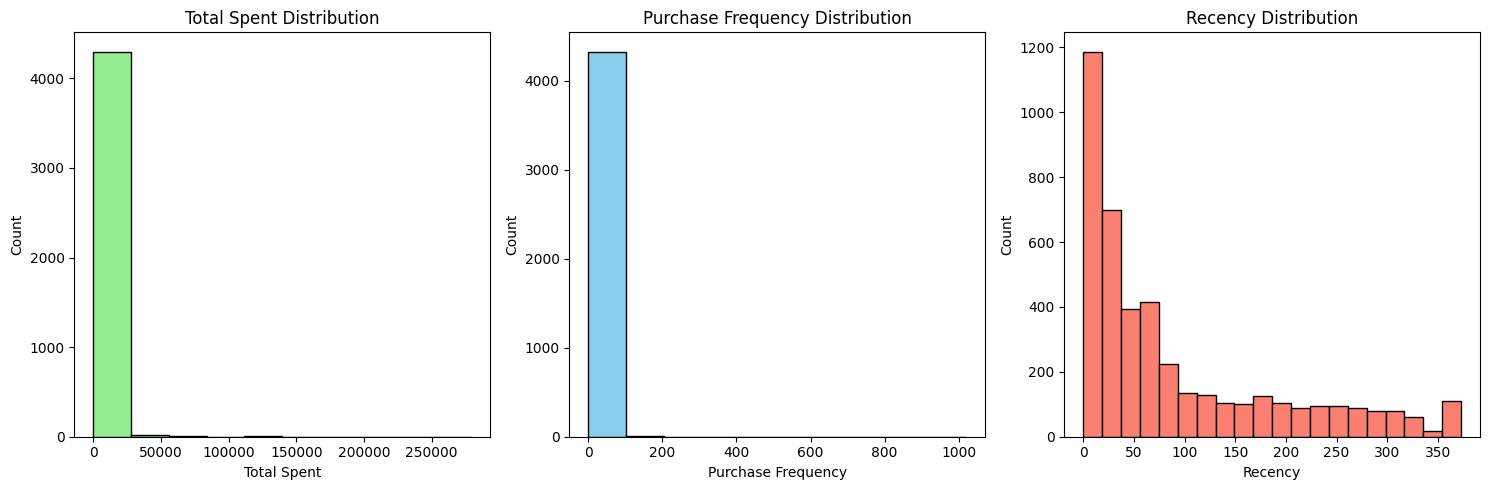

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) #r,c,current_col
plt.hist(customer_metrics['TotalSpent'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(customer_metrics['PurchaseFrequency'], bins=10, color='skyblue', edgecolor='black')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(customer_metrics['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Visualizing Feature Distribution

c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


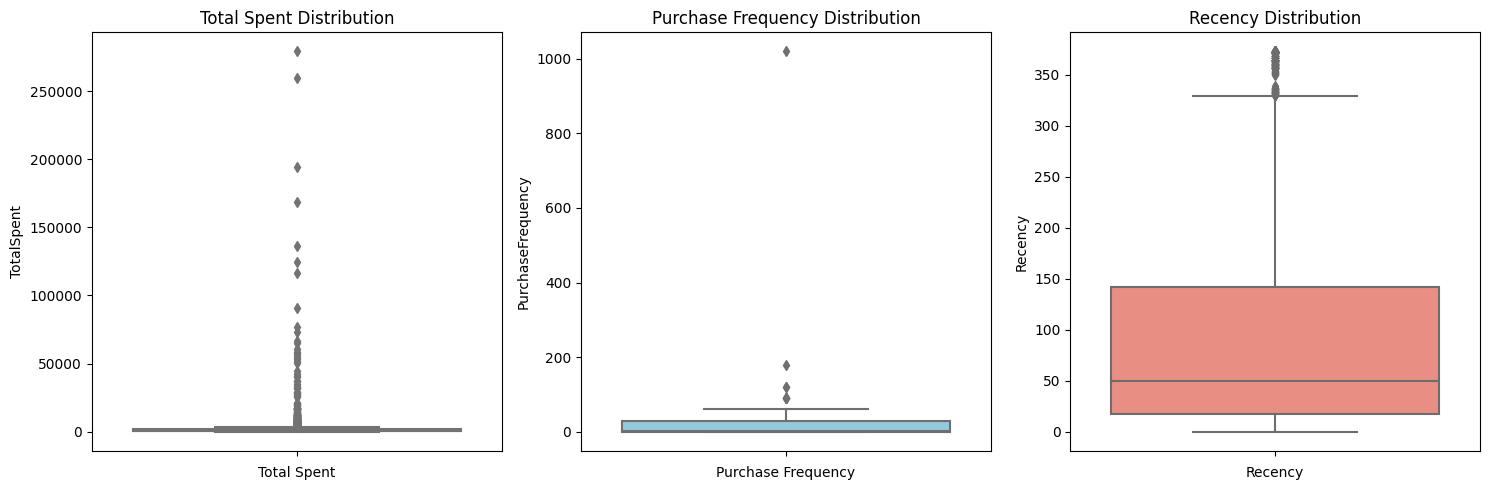

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=customer_metrics['TotalSpent'], color='lightgreen')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')

plt.subplot(1, 3, 2)
sns.boxplot(y=customer_metrics['PurchaseFrequency'], color='skyblue')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=customer_metrics['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### Splitting Total Spent & Purchase Frequency

In [5]:
M_Q1 = customer_metrics['TotalSpent'].quantile(0.25) 
M_Q3 = customer_metrics['TotalSpent'].quantile(0.75)

M_IQR = M_Q3 - M_Q1
total_spent_outliers_df = customer_metrics[(customer_metrics['TotalSpent'] > (M_Q3 + 1.5 * M_IQR)) |
                                           (customer_metrics['TotalSpent']  < (M_Q1 - 1.5 * M_IQR))].copy()
total_spent_outliers_df.describe()

,CustomerID,TotalSpent,OrderCount,CustomerLifespan,Recency,PurchaseFrequency
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,15033.644706,12568.004141,16.647059,297.538824,24.724706,5.562353
std,1797.854931,26097.899415,19.066978,90.191902,47.076383,50.663721
min,12346.000000,3622.680000,1.000000,1.000000,0.000000,0.280000
25%,13324.000000,4359.320000,8.000000,266.000000,3.000000,0.890000
50%,15005.000000,5891.610000,12.000000,336.000000,10.000000,1.250000
75%,16655.000000,9430.520000,19.000000,359.000000,23.000000,1.960000
max,18251.000000,279138.020000,206.000000,373.000000,371.000000,1020.000000


In [6]:
F_Q1 = customer_metrics['PurchaseFrequency'].quantile(0.25) 
F_Q3 = customer_metrics['PurchaseFrequency'].quantile(0.75)

F_IQR = F_Q3 - F_Q1
purchase_frequency_outliers_df = customer_metrics[(customer_metrics['PurchaseFrequency'] > (F_Q3 + 1.5 * F_IQR)) |
                                           (customer_metrics['PurchaseFrequency']  < (F_Q1 - 1.5 * F_IQR))].copy()
purchase_frequency_outliers_df.describe()

,CustomerID,TotalSpent,OrderCount,CustomerLifespan,Recency,PurchaseFrequency
count,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
mean,16360.888889,7624.741111,7.000000,1.0,97.222222,210.000000
std,1181.362502,12875.481891,10.173495,0.0,120.492508,305.204849
min,15060.000000,62.430000,3.000000,1.0,2.000000,90.000000
25%,15516.000000,301.840000,3.000000,1.0,17.000000,90.000000
50%,16000.000000,1309.140000,3.000000,1.0,44.000000,90.000000
75%,17545.000000,8438.340000,4.000000,1.0,153.000000,120.000000
max,18139.000000,39916.500000,34.000000,1.0,371.000000,1020.000000


In [7]:
non_outliers_df = customer_metrics[(~customer_metrics.index.isin(total_spent_outliers_df.index)) &
                                   (~customer_metrics.index.isin(purchase_frequency_outliers_df.index))]
non_outliers_df.describe()

,CustomerID,TotalSpent,OrderCount,CustomerLifespan,Recency,PurchaseFrequency
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,15327.227715,875.302759,2.897029,112.644980,99.034068,13.053681
std,1711.946194,815.455614,2.579537,122.488523,101.753371,15.159717
min,12348.000000,3.750000,1.000000,1.000000,0.000000,0.160000
25%,13852.500000,282.385000,1.000000,1.000000,21.000000,0.580000
50%,15334.500000,579.385000,2.000000,62.000000,58.000000,1.460000
75%,16803.250000,1227.025000,4.000000,218.000000,157.000000,30.000000
max,18287.000000,3619.170000,39.000000,372.000000,373.000000,60.000000


### Distribution After Split

c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


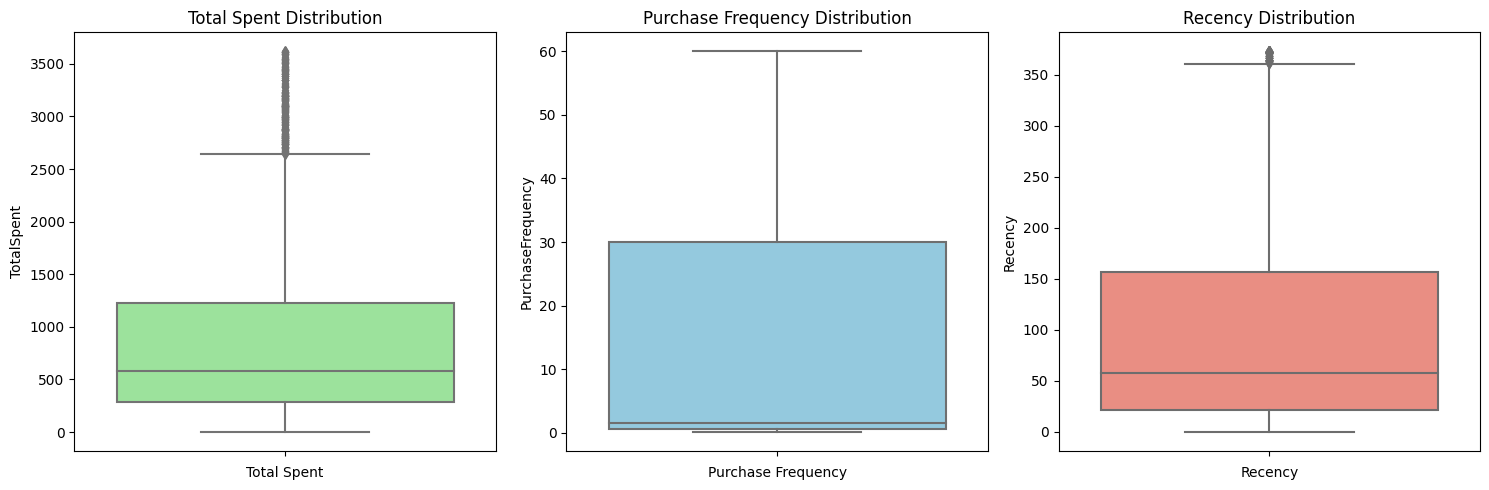

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=non_outliers_df['TotalSpent'], color='lightgreen')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')

plt.subplot(1, 3, 2)
sns.boxplot(y=non_outliers_df['PurchaseFrequency'], color='skyblue')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show() 

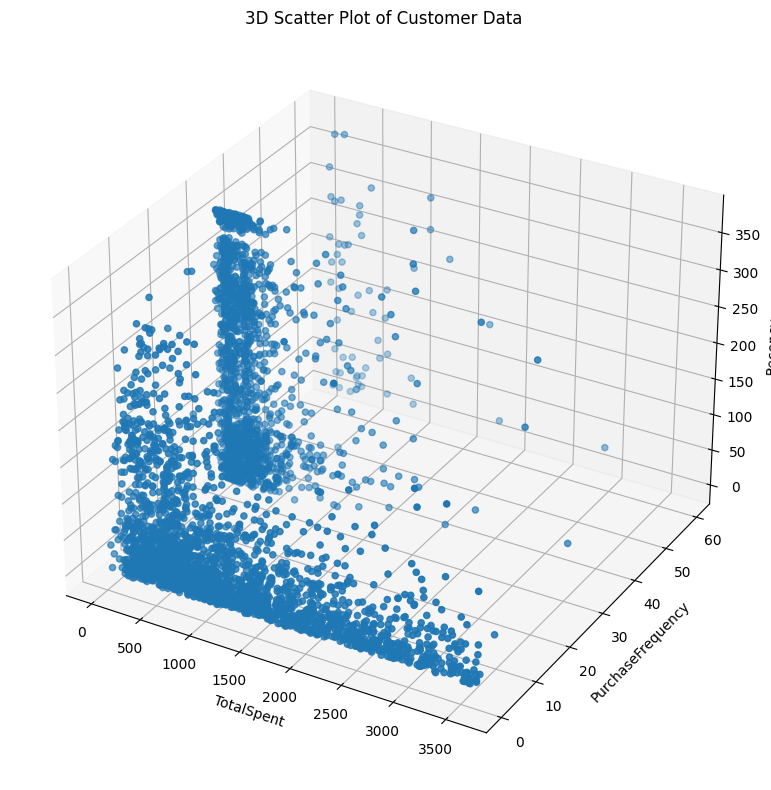

In [10]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(
  non_outliers_df['TotalSpent'],
  non_outliers_df['PurchaseFrequency'],
  non_outliers_df['Recency']
)
ax.set_xlabel('TotalSpent')
ax.set_ylabel('PurchaseFrequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

### Exporting Data

In [11]:
non_outliers_df.to_csv('../data/processed/customer_metrics_non_outliers.csv', index=False)